In [27]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import  defaultdict

import sys
if "../.." not in sys.path:
    sys.path.append("../..")
from utils.tools import input_json
from root import absolute


## GLOBAL

In [54]:
EMBEDDING_DATA_PATH = "result/pics/v2.0/embedding_d.json"
EMBEDDING_RANGE = [2, 4, 8, 16, 32, 64]
DENSITY_RANGE = ([0.05, 0.10, 0.15, 0.20])

COLORS = [

    ["#53BF9D","#F94C66","#BD4291","#FFC54D"],
    ["#EB5353","#F9D923","#36AE7C","#187498"]

]
MID_FONT_SIZE = 18
LARGE_FONT_SIZE = 22
SMALL_FONT_SIZE = 16
TINY_FONT_SIZE = 14
plt.rc('font',family="Times New Roman")

In [55]:
def gen_embedding_pic_data(data,data_type="rt",index="mae"):
    res = []
    for dims,v in data.items():
        if index == "mae":
            temp = v[data_type][::2]
        else:
            temp = v[data_type][1::2]
        res.append(temp)
    return res

In [48]:
json_data = input_json(absolute(EMBEDDING_DATA_PATH))
def draw(fig,ax_title,data_key,zlabel_name):
    ax = Axes3D(fig)
    x = np.array(EMBEDDING_RANGE)
    y = np.array(DENSITY_RANGE)
    X,Y = np.meshgrid(x, y)
    # ax.set_title(ax_title)
    data_type,data_index = data_key.split("_")
    data = np.array(gen_embedding_pic_data(json_data,data_type=data_type,index=data_index)).T
    surf = ax.plot_surface(
                    X,Y,data,
                    rstride=1, # rstride（row）指定行的跨度
                    cstride=1, # cstride(column)指定列的跨度
                    cmap=plt.get_cmap('rainbow') # 设置颜色映射
                ) # 这个的含义

    ax.set(xticks=[2,4,8,16,32,64])
    ax.set(yticks=[0.05,0.1,0.15,0.2])

    ax.tick_params(labelsize = LARGE_FONT_SIZE, pad = 5, axis = 'x')
    ax.tick_params(labelsize = LARGE_FONT_SIZE, pad = 5, axis = 'y')
    ax.tick_params(labelsize = LARGE_FONT_SIZE, pad = 5, axis = 'z')
    
    cbar = fig.colorbar(surf, shrink=0.8, aspect=13, pad=0)
    cbar.ax.tick_params(labelsize=MID_FONT_SIZE)

    # ax.w_xaxis.set_pane_color([1.0,1.0,1.0,1.0]) # 围墙
    # ax.w_yaxis.set_pane_color([1.0,1.0,1.0,1.0]) # 围墙
    # ax.w_zaxis.set_pane_color([1.0,1.0,1.0,1.0]) # 围墙

    # ax.w_xaxis.set_pane_color([237/255,228/255,224/255,1.0]) # 围墙
    # ax.w_yaxis.set_pane_color([237/255,228/255,224/255,1.0]) # 围墙
    # ax.w_zaxis.set_pane_color([237/255,228/255,224/255,1.0]) # 围墙

    ax.w_xaxis.set_pane_color([245/255, 245/255, 245/255,1.0]) # 围墙
    ax.w_yaxis.set_pane_color([245/255, 245/255, 245/255,1.0]) # 围墙
    ax.w_zaxis.set_pane_color([245/255, 245/255, 245/255,1.0]) # 围墙


    ax.set_xlabel("Dimensionality", size=LARGE_FONT_SIZE, fontweight="bold", labelpad = 13)
    ax.set_ylabel("Density", size=LARGE_FONT_SIZE, fontweight="bold", labelpad = 13)
    ax.set_zlabel(zlabel_name,{"rotation":"vertical"}, size=LARGE_FONT_SIZE, fontweight="bold", labelpad = 13)


    ax.grid(True)
    ax.view_init(elev=25,azim=45) # 这个是怎么用的


/Users/wenzhuo/opt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


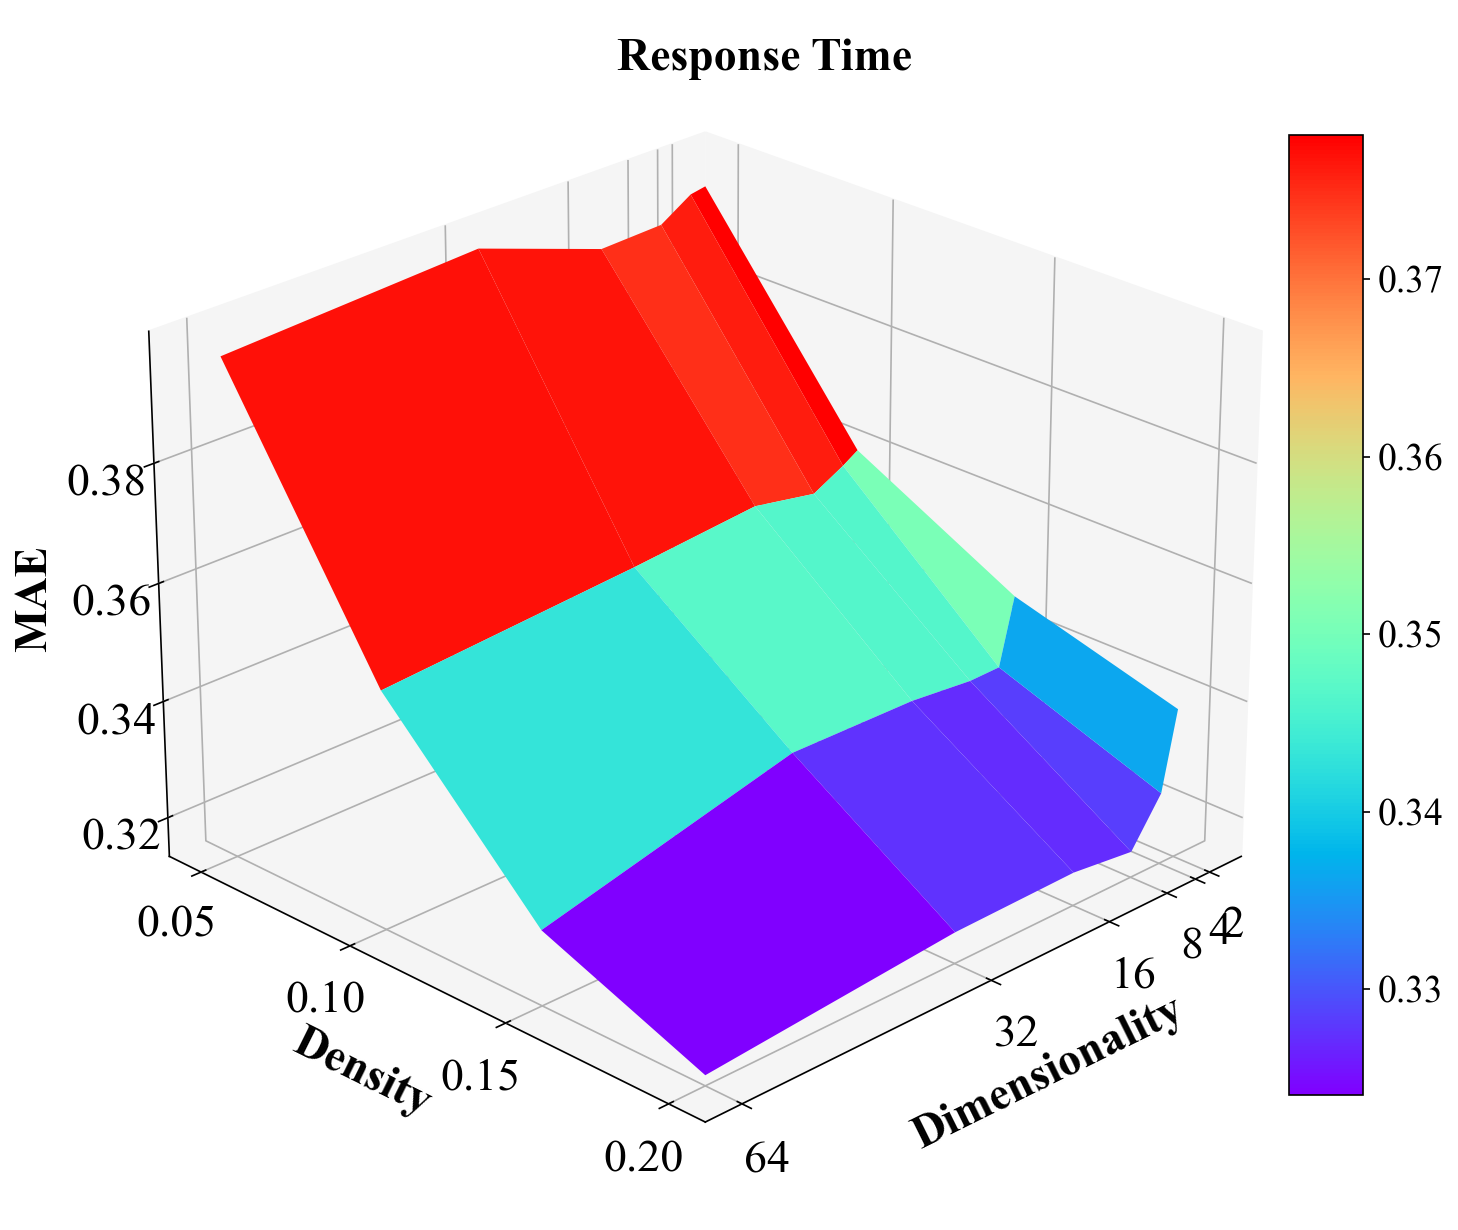

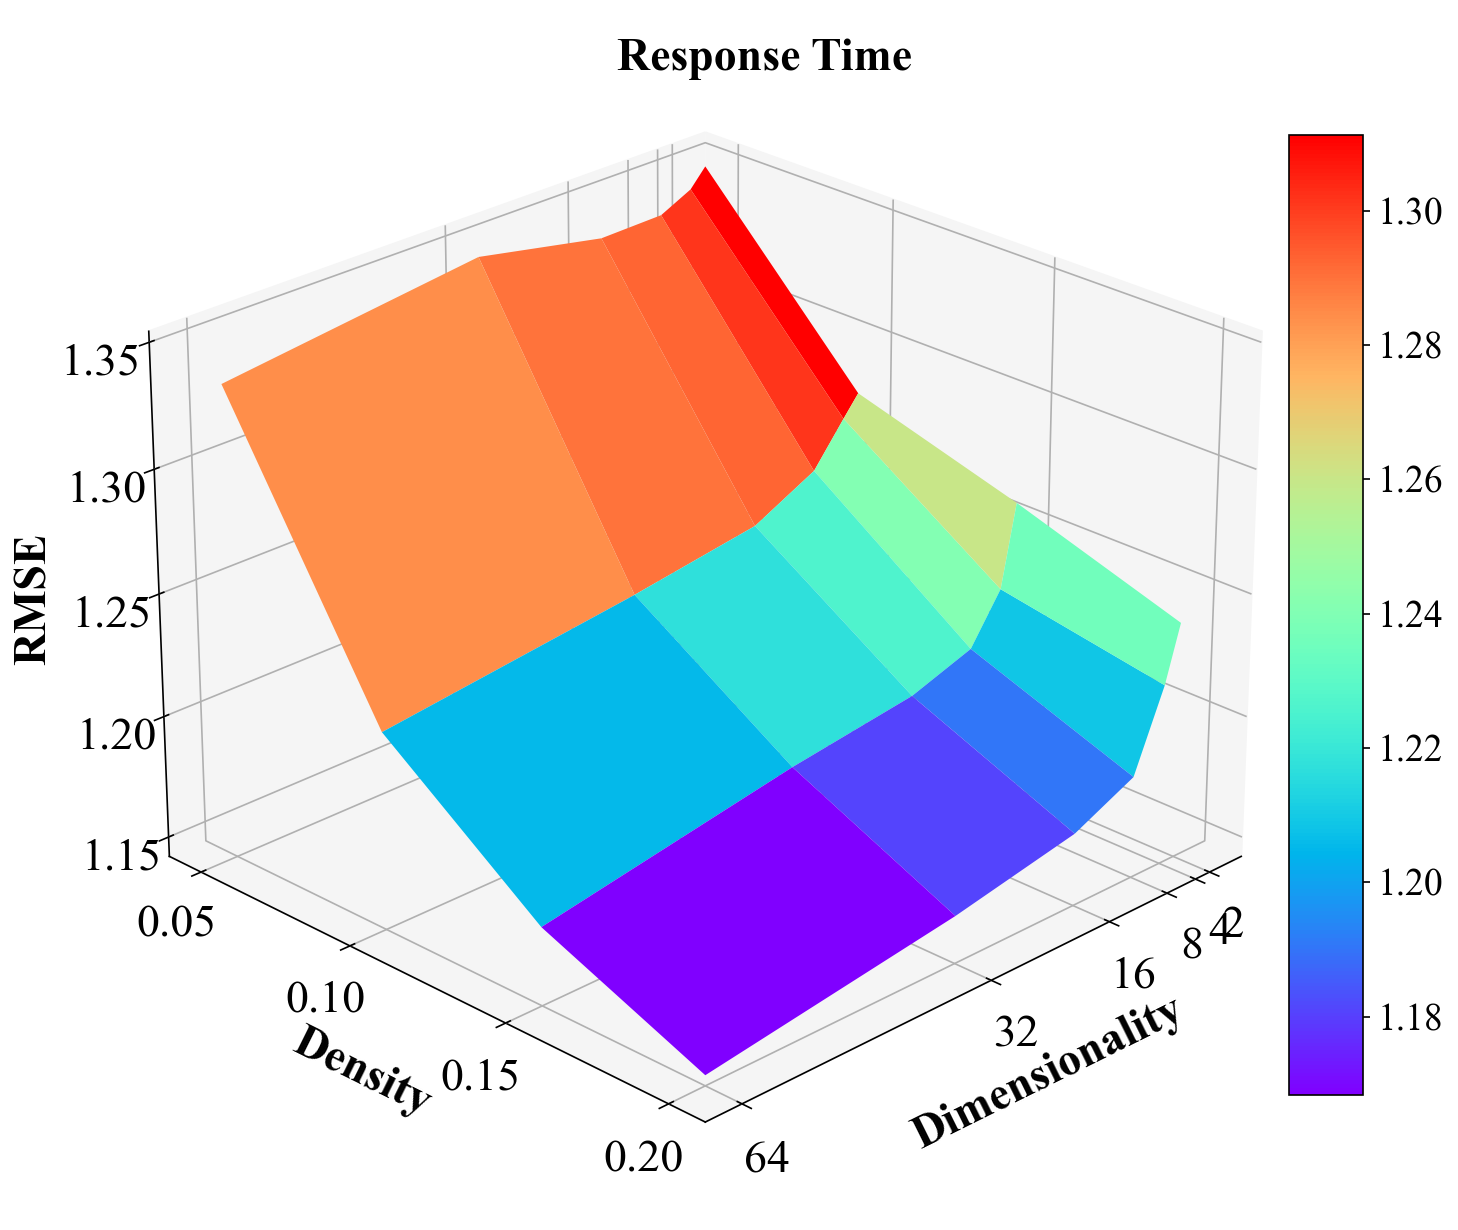

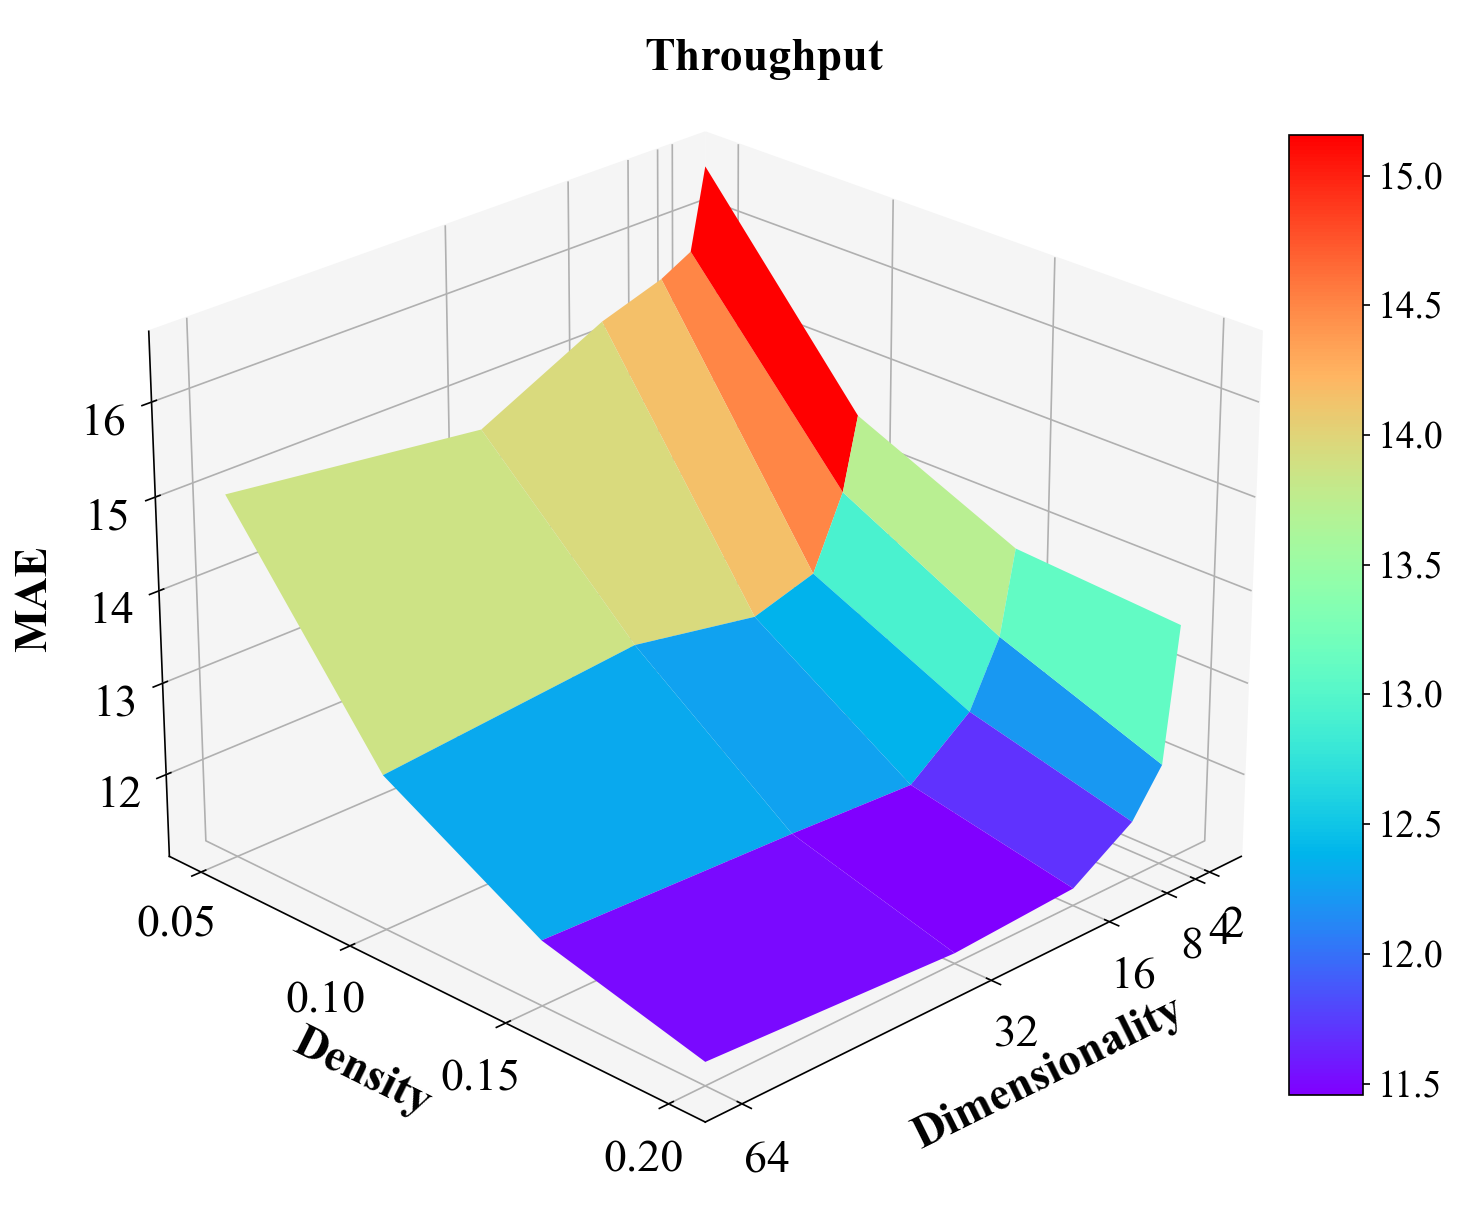

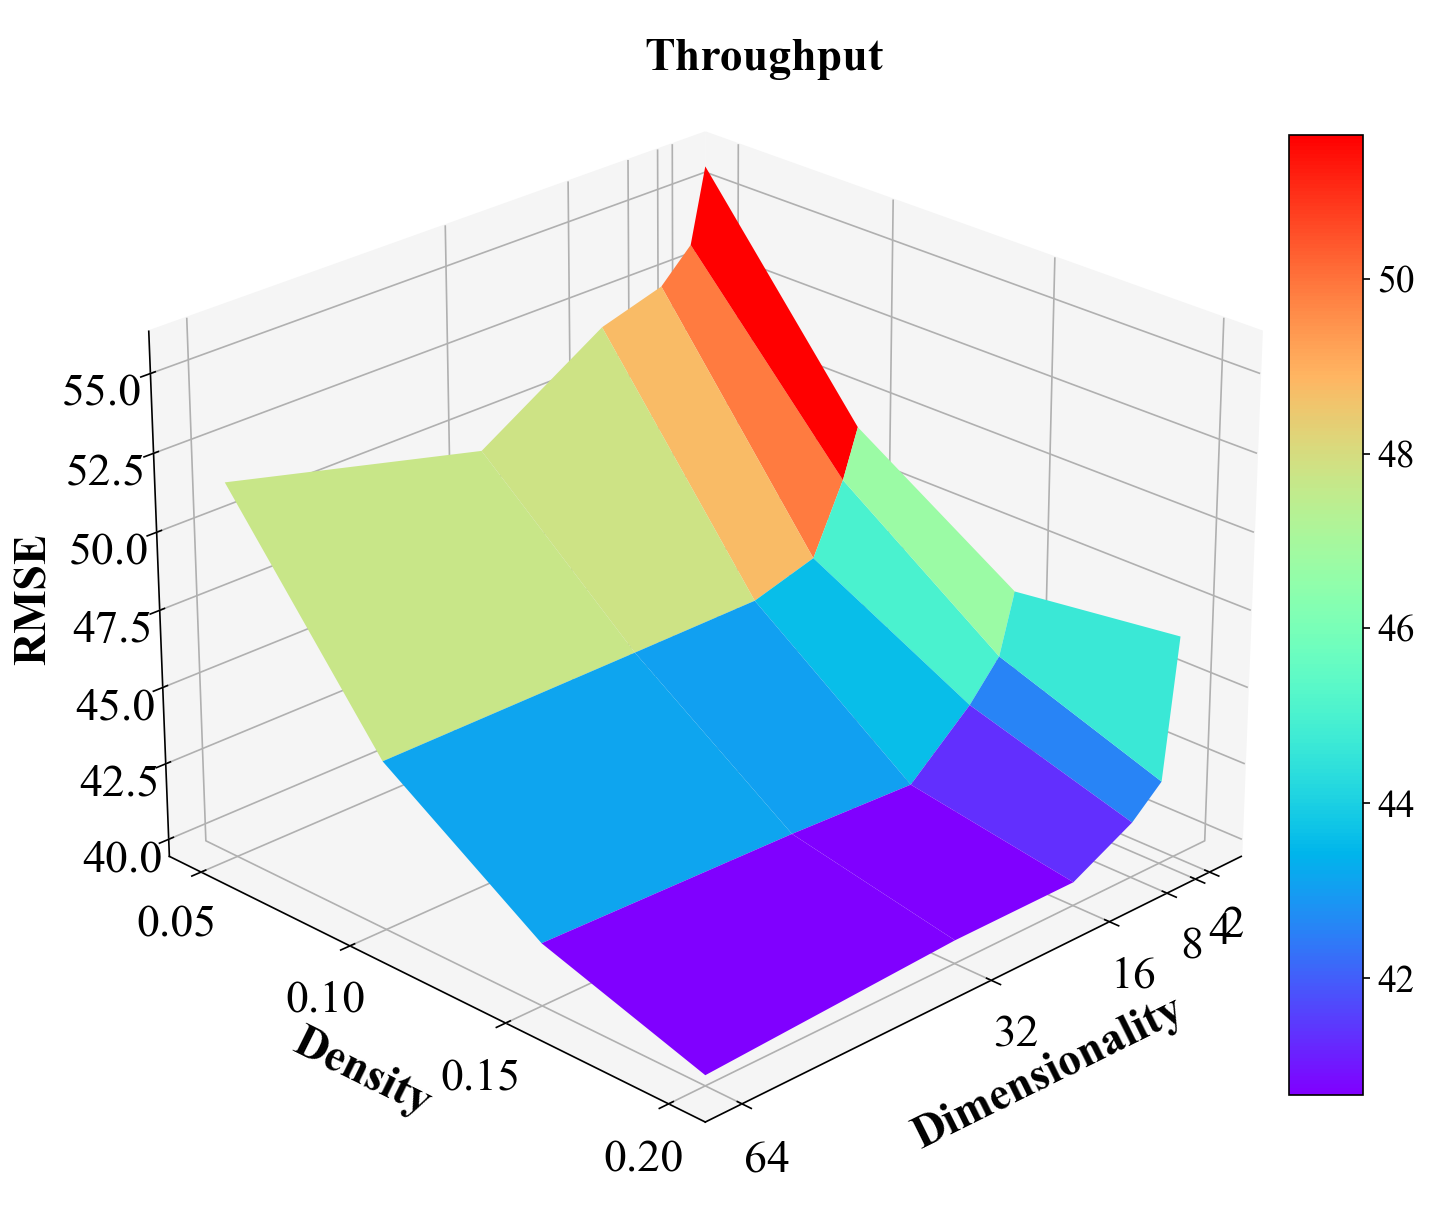

In [49]:

for name in ["rt_mae","rt_rmse","tp_mae","tp_rmse"]:
    fig = plt.figure(figsize=(10, 8),dpi=150)

    if "rt" in name:
        fig.suptitle("Response Time", fontsize=LARGE_FONT_SIZE, fontweight="bold")

        if "mae" in name:
            draw(fig,"Response Time",name,"MAE")
        if "rmse" in name:
            draw(fig,"Response Time",name,"RMSE")

    if "tp" in name:
        fig.suptitle("Throughput", fontsize=LARGE_FONT_SIZE, fontweight="bold")

        if "mae" in name:
            draw(fig,"Throughput",name,"MAE")
        if "rmse" in name:
            draw(fig,"Throughput",name,"RMSE")
    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/QoS预测实验代码/SCDM/result/pics/{name}.png")
    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/pics/{name}.png")
    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/论文/草稿/初稿/resources/{name}.png")

### 客户端数量

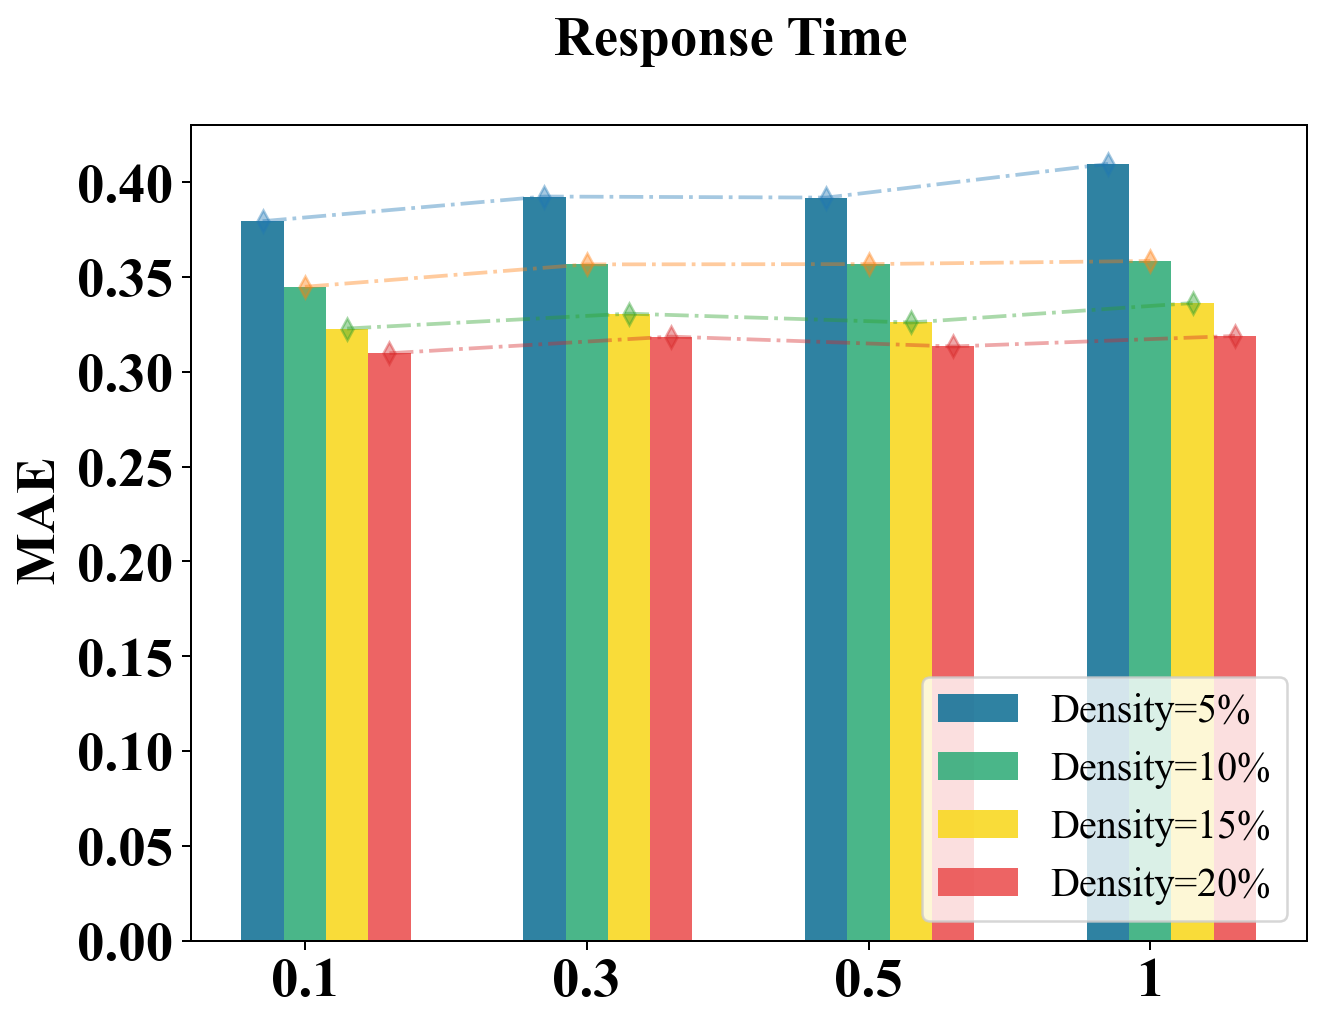

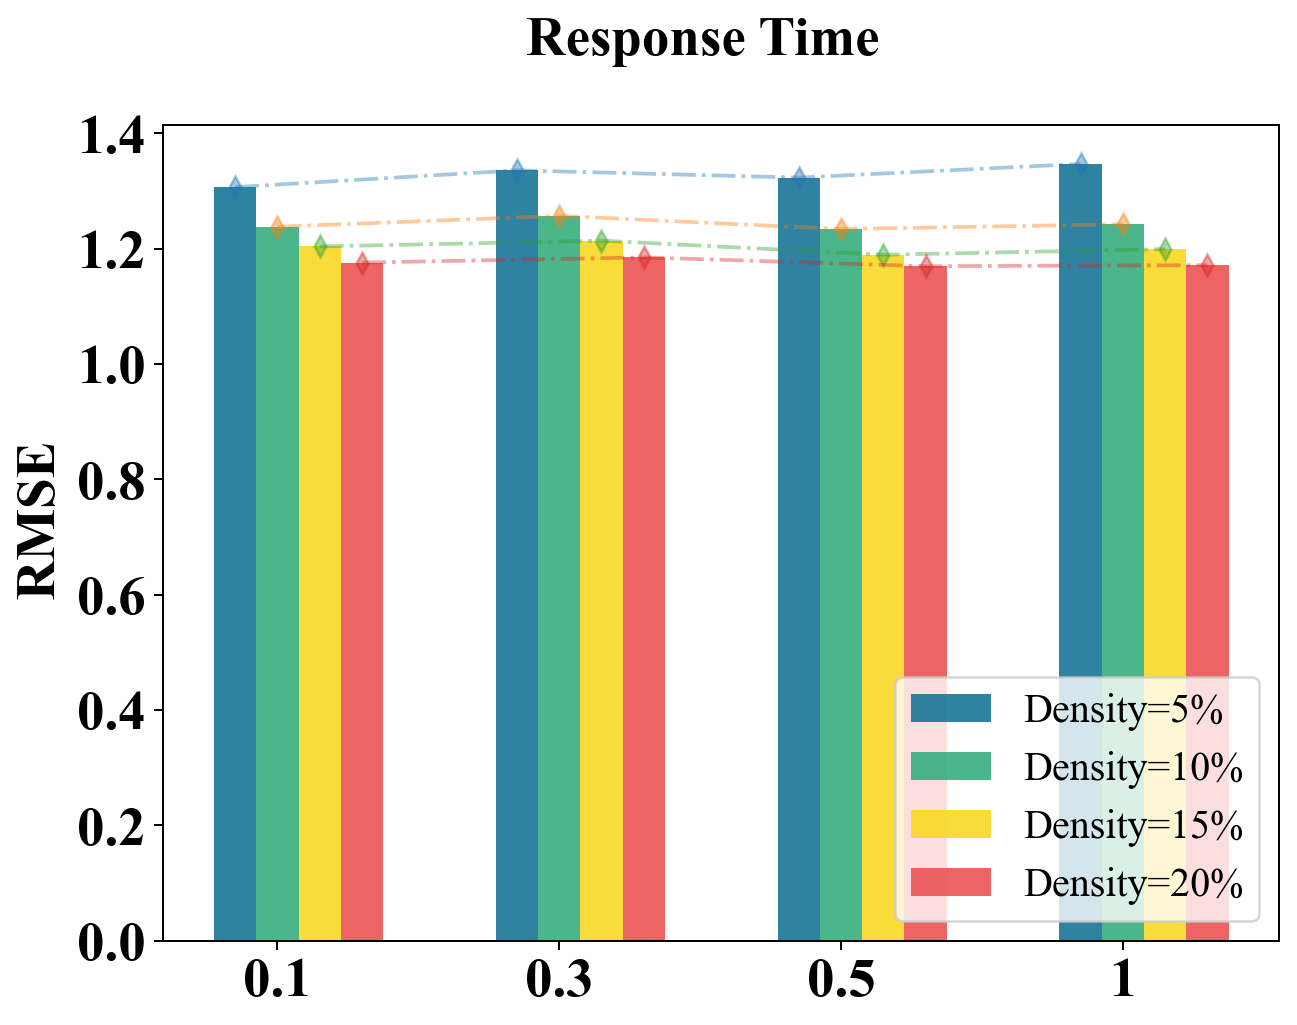

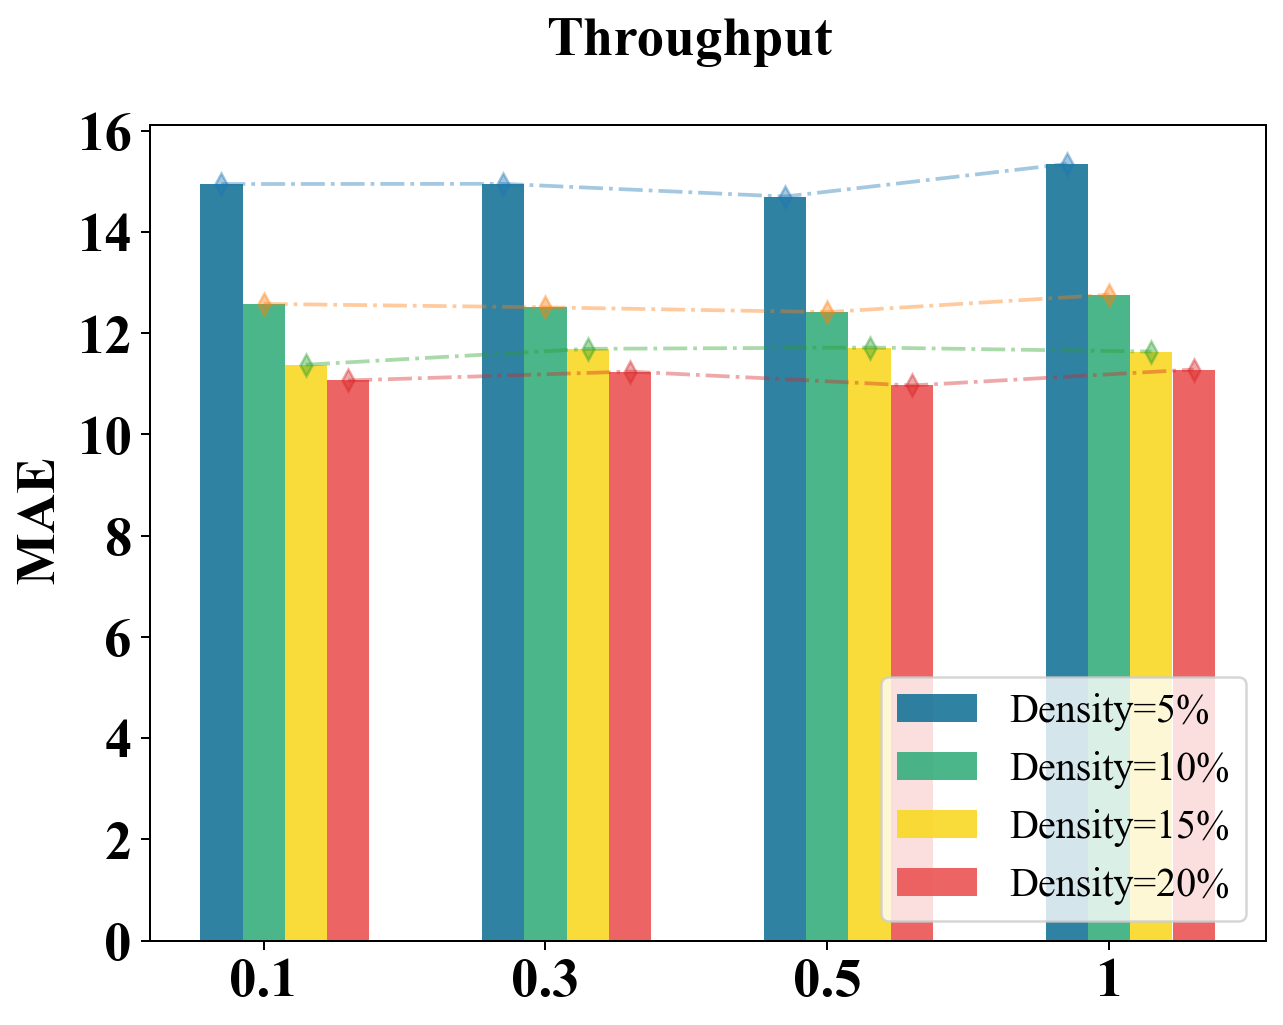

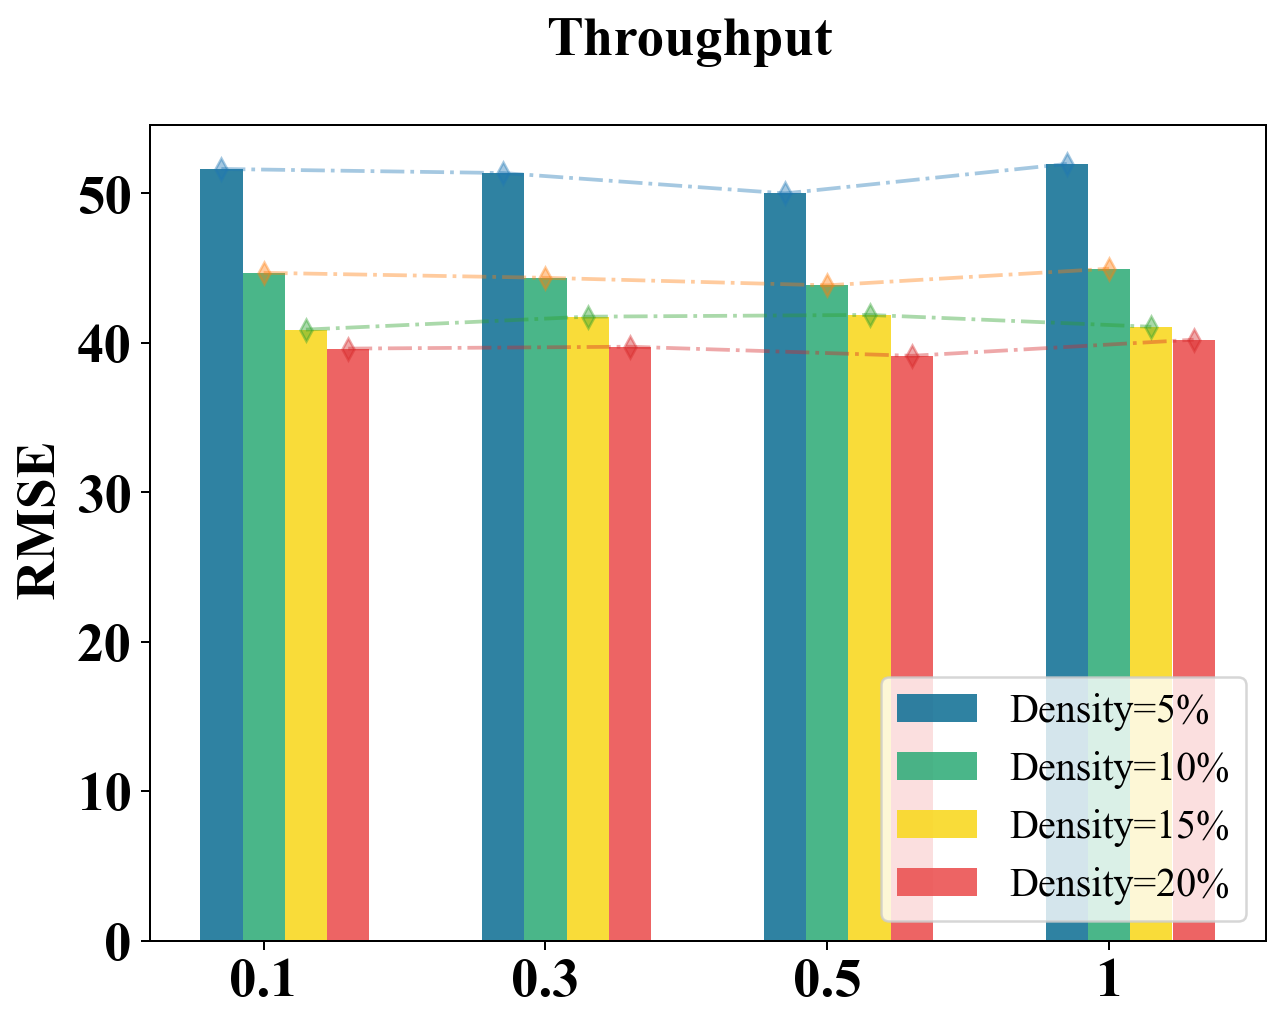

In [73]:
json_data = input_json(absolute("result/pics/v2.0/clients_rate.json"))
def get_client_fraction_data(json_data,data_type="rt",index="mae"):
    res = []
    for dims,v in json_data.items():
        if index == "mae":
            temp = v[data_type][::2]
        else:
            temp = v[data_type][1::2]
        res.append(temp)
    return res
def draw(json_data,data_type="rt",data_index="mae"):

    data = np.array(get_client_fraction_data(json_data,data_type,data_index)).T

    bar_width = 0.15
    rates = [0.1,0.3,0.5,1]
    density = ["5%","10%","15%","20%"]

    br1 = np.arange(len(rates))
    br2 = [x + bar_width for x in br1]
    br3 = [x + bar_width for x in br2]
    br4 = [x + bar_width for x in br3]

    bars = [br1,br2,br3,br4]
    for idx in range(len(rates)):
        plt.bar(bars[idx],data[idx],width=bar_width,color=COLORS[1][::-1][idx],label=f"Density={density[idx]}",alpha=0.9)
        plt.plot(bars[idx],data[idx],linestyle="dashdot",marker="d",alpha=0.4)

    plt.ylabel("  " + data_index.upper(), fontsize = LARGE_FONT_SIZE, fontweight="bold")
    plt.xticks([r + bar_width for r in range(4)],rates, fontsize=LARGE_FONT_SIZE, fontweight="bold")
    plt.yticks(fontsize=LARGE_FONT_SIZE,fontweight="bold")
    plt.legend(loc=4,fontsize=SMALL_FONT_SIZE)

    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/QoS预测实验代码/SCDM/result/pics/results_client_rate_{data_type}_{data_index}.png")
    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/pics/results_client_rate_{data_type}_{data_index}.png")
    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/论文/草稿/初稿/resources/results_client_rate_{data_type}_{data_index}.png")
    
    plt.show()


for name in ["rt_mae","rt_rmse","tp_mae","tp_rmse"]:
    fig = plt.figure(figsize=(8,6),dpi=180)

    if "rt" in name:
        fig.suptitle("Response Time", fontsize=LARGE_FONT_SIZE, fontweight="bold")
    elif "tp" in name:
        fig.suptitle("Throughput", fontsize=LARGE_FONT_SIZE, fontweight="bold")
    type_,index = name.split("_")
    draw(json_data,type_,index)

## 结果

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("deep")
import pandas as pd


import sys
if "../.." not in sys.path:
    sys.path.append("../..")
from utils.tools import input_json
from root import absolute

# GLOBAL SETTINGS
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MID_FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MID_FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MID_FONT_SIZE)    # legend fontsize
plt.rc('font', size=MID_FONT_SIZE)          # controls default text sizes


RT_DATA = input_json(absolute("result/pics/v2.0/results/RT.json"))
METHODS_LIST = list(RT_DATA.keys())


RT_MAE_DATA = {k:v[::2] for k,v in RT_DATA.items()}
RT_RMSE_DATA = {k:v[1::2] for k,v in RT_DATA.items()}


TP_DATA = input_json(absolute("result/pics/v2.0/results/TP.json"))
TP_MAE_DATA = {k:v[::2] for k,v in TP_DATA.items()}
TP_RMSE_DATA = {k:v[1::2] for k,v in TP_DATA.items()}
XTICKS = [0.05,0.1,0.15,0.2]
# fig = plt.figure(figsize=(8,5),dpi=180,tight_layout=True)
# fig = plt.figure(figsize=(8,5),dpi=180)


# plt.xticks([0.05,0.1,0.15,0.2])
# for method in METHODS_LIST:
#     plt.plot(XTICKS,RT_MAE_DATA[f"{method}"],"go--",linewidth=2)

# plt.legend(labels=METHODS_LIST)

def draw_pics(dataset,dataset_name,index_name):

    fig = plt.figure(figsize=(16,10),dpi=220,tight_layout=True)
    ml = []
    for idx,method in enumerate(["LDCF","FedLDCF","NCF","FedNCF","ours","FedOurs-P","PMF","EFMF"]):
    # for idx,method in enumerate(["NCF","FedNCF"]):

        if idx % 2 == 0:
            color = ["#F8CB2E","#006E7F","#EE5007","#6EBF8B"][idx // 2]
        if "Fed" in method or "EFMF" in method:
            ml.append(method)
            plt.plot(XTICKS,dataset[f"{method}"],color=color,linestyle="solid",marker="d", alpha=1, linewidth=2)
        else:
            ml.append(method)
            plt.plot(XTICKS,dataset[f"{method}"],color=color,linestyle="dashed",marker="d",linewidth=2)

    plt.ylabel(index_name)
    plt.xlabel("Density")
    plt.title(dataset_name)
    plt.legend(labels=ml,loc=1,fontsize=15)
    

    plt.xticks([0.05,0.1,0.15,0.2])

    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/QoS预测实验代码/SCDM/result/pics/results_{dataset_name}_{index_name}.png")
    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/pics/results_{dataset_name}_{index_name}.png")

index_name = ["MAE","RMSE","MAE","RMSE"]
dataset_name = ["Response Time","Response Time","ThroughPut","ThroughPut"]

for idx,data in enumerate([RT_MAE_DATA,RT_RMSE_DATA,TP_MAE_DATA,TP_RMSE_DATA]):

    draw_pics(data,dataset_name=dataset_name[idx],index_name=index_name[idx])

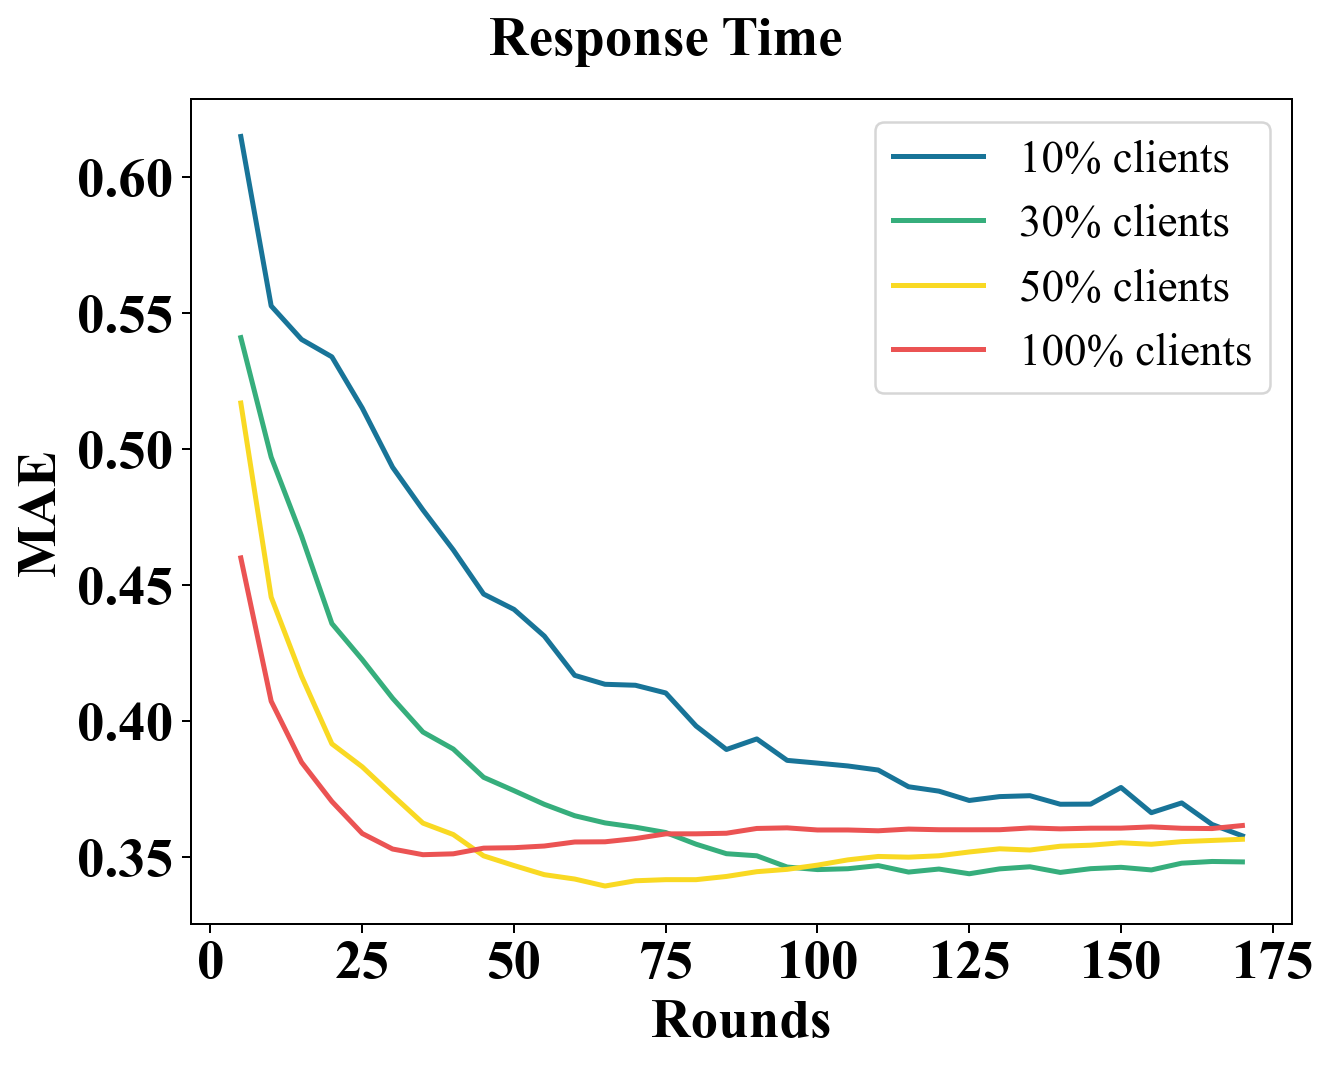

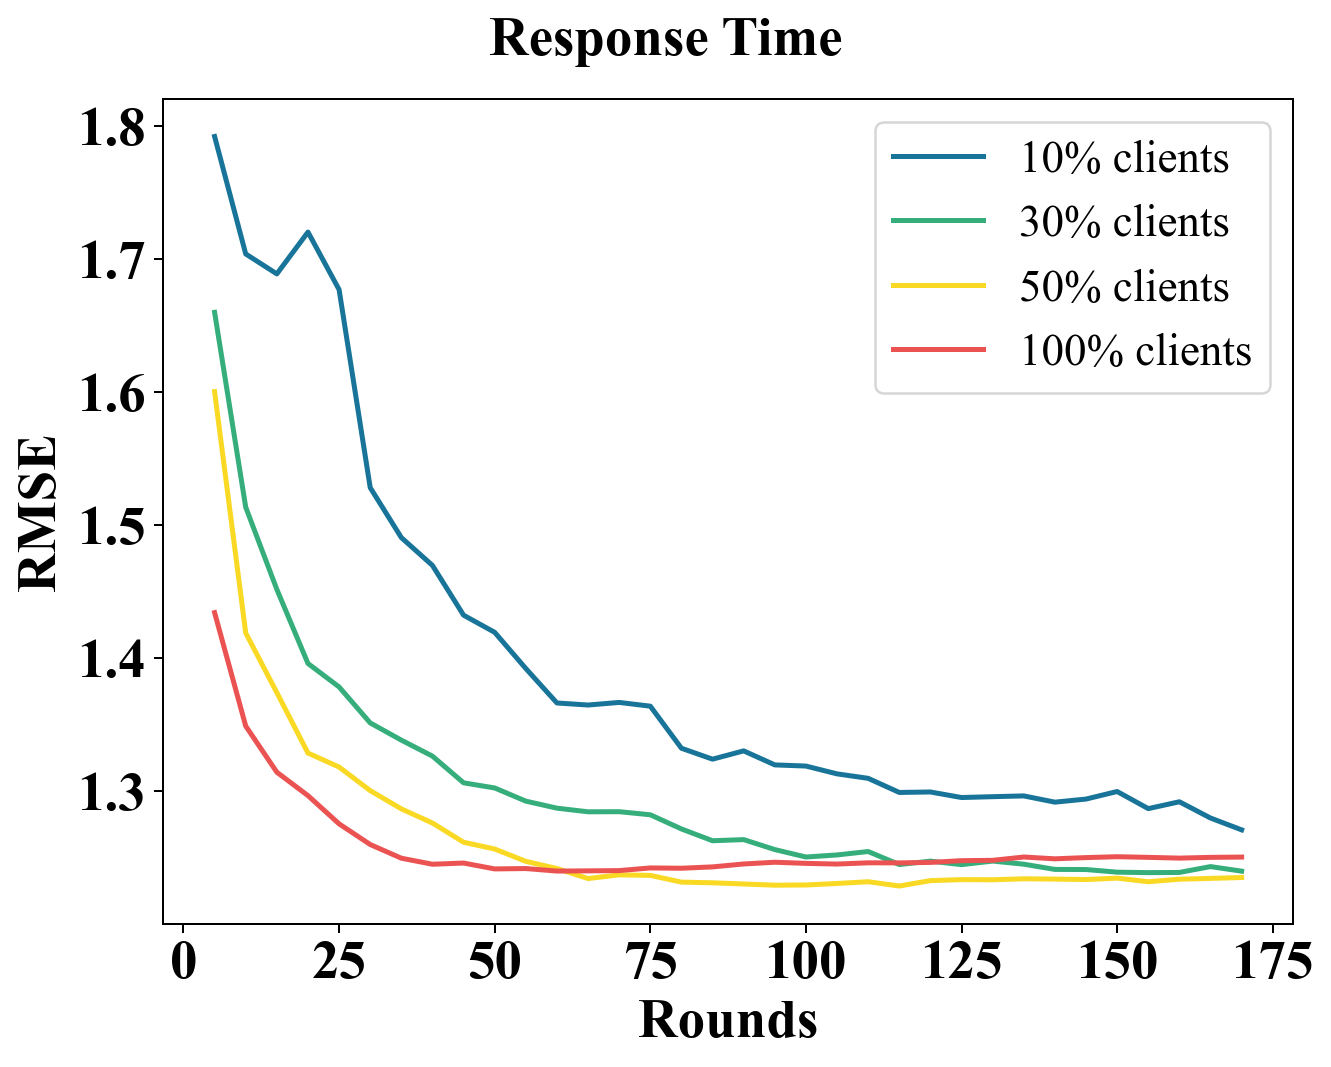

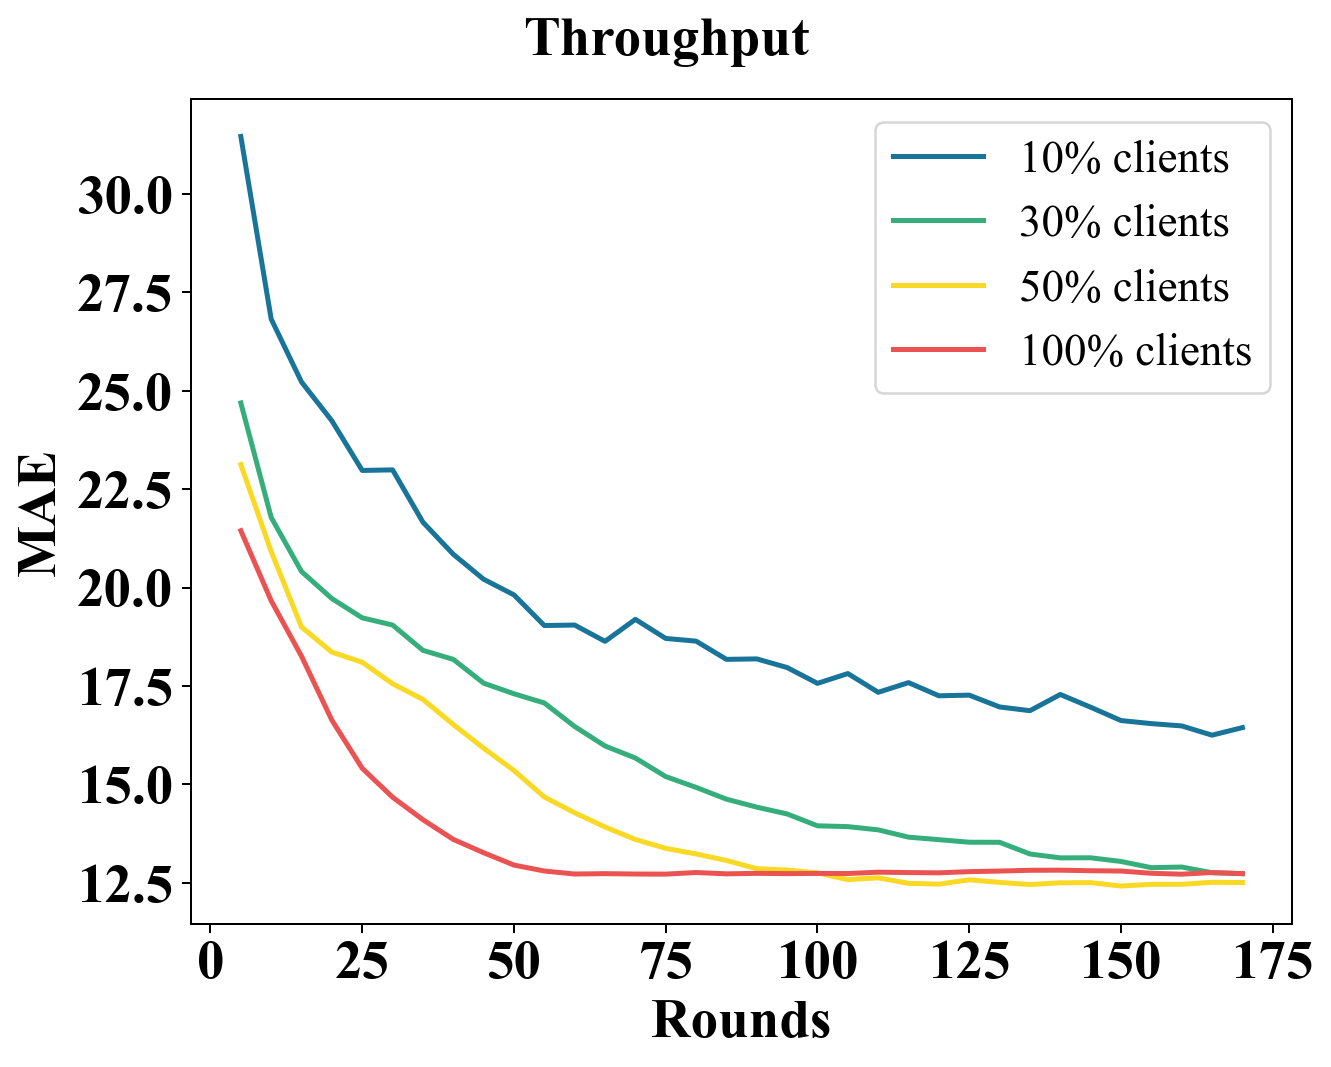

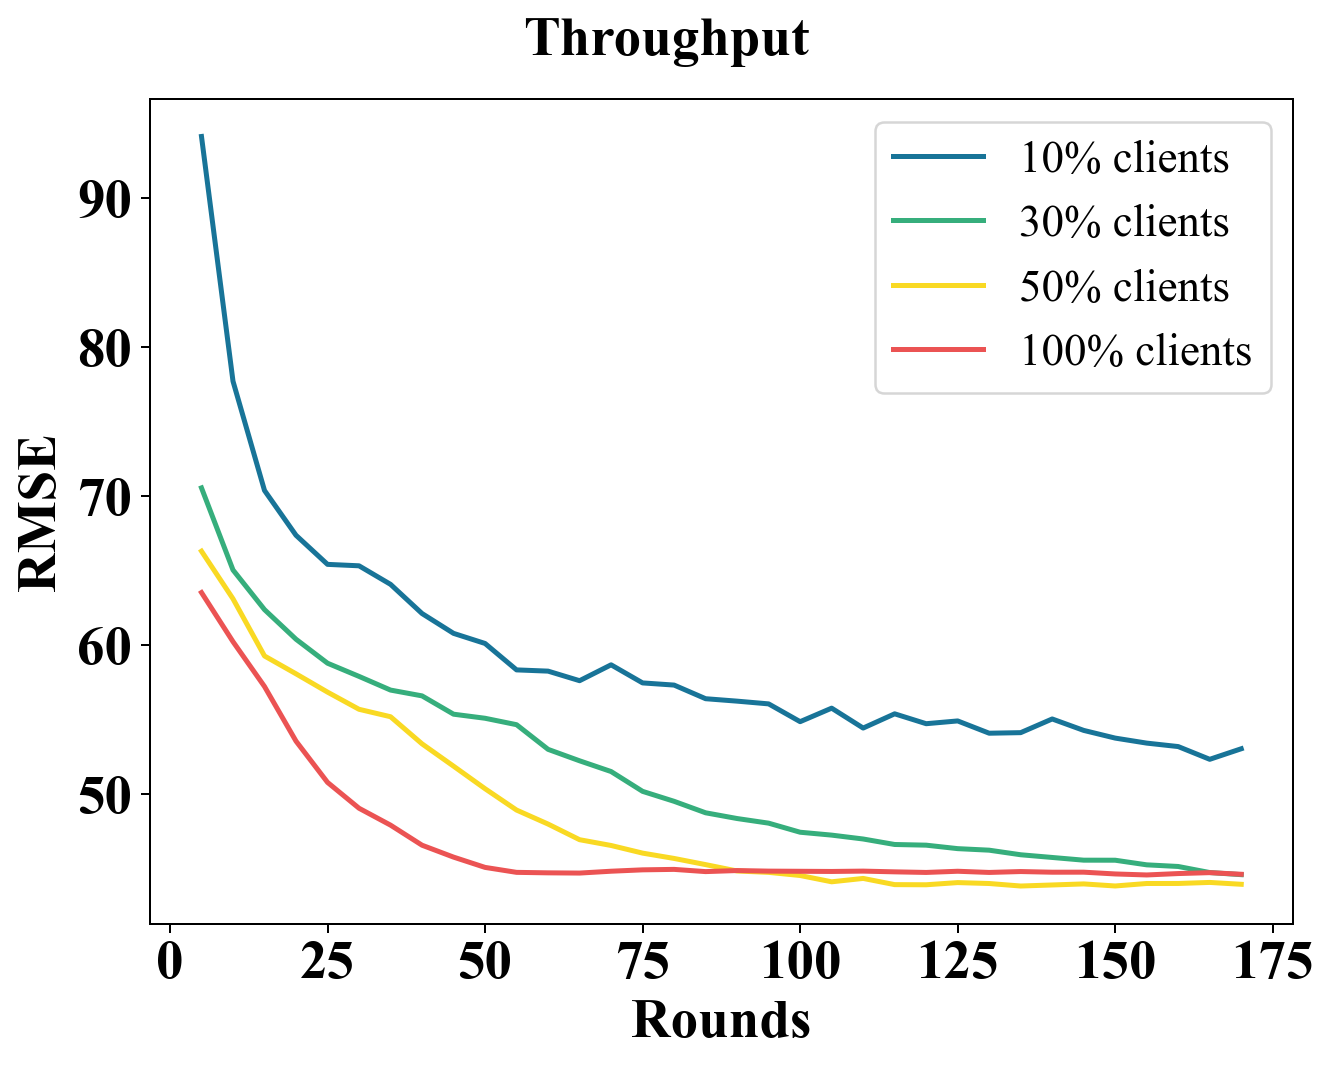

In [74]:
import tensorboard as tb
def draw(data_type="rt",data_index="mae"):
    fig = plt.figure(figsize=(7.5,6),dpi=180,tight_layout=True)
    if data_type == "rt":
        fig.suptitle("Response Time",fontsize=LARGE_FONT_SIZE, fontweight="bold")
    else:
        fig.suptitle("Throughput",fontsize=LARGE_FONT_SIZE, fontweight="bold")
            
    for idx,rate in enumerate([0.1,0.3,0.5,1]):
        data_path = f"{rate}-{data_type.upper()}-{data_index.upper()}.json"

        data = np.array(input_json(absolute(f"result/pics/v2.0/tensorboard/{data_path}")))
        x = data[:,1][:34]
        y = data[:,2][:34]
        plt.xticks(fontsize=LARGE_FONT_SIZE, fontweight="bold")
        plt.yticks(fontsize=LARGE_FONT_SIZE,fontweight="bold")
        plt.plot(x,y,label=f"{rate*100:.0f}% clients",color=COLORS[1][::-1][idx],linewidth=2)    

        plt.ylabel(data_index.upper(), fontsize = LARGE_FONT_SIZE, fontweight="bold")
        plt.xlabel('Rounds', fontsize = LARGE_FONT_SIZE, fontweight="bold")

        plt.legend(fontsize=MID_FONT_SIZE)

    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/QoS预测实验代码/SCDM/result/pics/results_client_rate_{data_type}_{data_index}_c.png")
    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/pics/results_client_rate_{data_type}_{data_index}_c.png")
    plt.savefig(f"/Users/wenzhuo/Desktop/workbench/研究生/科研/论文/草稿/初稿/resources/results_client_rate_{data_type}_{data_index}_c.png")
    
# plt.plot(data[:,1:])

draw(data_type="rt",data_index="mae")
draw(data_type="rt",data_index="rmse")
draw(data_type="tp",data_index="mae")
draw(data_type="tp",data_index="rmse")


In [77]:

if "rt" in name:
    fig.suptitle("Response Time", fontsize=SMALL_FONT_SIZE)

    if "mae" in name:
        draw(fig,"Response Time",name,"MAE")
    if "rmse" in name:
        draw(fig,"Response Time",name,"RMSE")

if "tp" in name:
    fig.suptitle("Throughput", fontsize=SMALL_FONT_SIZE)

    if "mae" in name:
        draw(fig,"Throughput",name,"MAE")
    if "rmse" in name:
        draw(fig,"Throughput",name,"RMSE")

TypeError: draw() takes from 0 to 2 positional arguments but 4 were given

In [ ]:
import sys
if "../.." not in sys.path:
    sys.path.append("../..")

from utils.tools import input_json
from root import absolute


RT = input_json("/Users/wenzhuo/Desktop/workbench/研究生/科研/QoS预测实验代码/SCDM/result/pics/v2.0/results/RT.json")
TP = input_json("/Users/wenzhuo/Desktop/workbench/研究生/科研/QoS预测实验代码/SCDM/result/pics/v2.0/results/TP.json")

for model in ["LDCF","NCF","ours","PMF"]:
    data = TP[model]
    if model == "LDCF":
        model = "FedLDCF"
    elif model == "NCF":
        model = "FedNCF"
    elif model == "ours":
        model = "FedOurs-P"
    elif model == "PMF":
        model = "EFMF"
    fed_data = TP[model]
    i = 6
    mae = data[i]
    rmse = data[i+1]
    fed_mae = fed_data[i]
    fed_rmse = fed_data[i+1]

    print("TP",model,i,mae,fed_mae,(mae-fed_mae)/mae)
    print("TP",model,i,rmse,fed_rmse,(rmse-fed_rmse)/rmse)
